In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from helpers.replay_buffer import ReplayBuffer
from helpers.chain_environment import SimpleChain
from helpers.shedules import LinearSchedule
from helpers.create_empty_directory import create_empty_directory
from helpers.plots import plot_q_func_and_visitations

In [4]:
def tabular_q_learning(env, num_episodes,gamma=0.99, 
                       eps_params=None, lr=0.1,
                       img_folder='images', with_lr=True, check_done=True):
    
    create_empty_directory(img_folder)
    
    dim_states = env.observation_space.shape[0]
    num_actions = env.action_space.n
    np.random.seed(42)
    
    # define shedule of epsilon in epsilon-greedy exploration
    if eps_params is not None:
        schedule_timesteps = int(eps_params['exploration_fraction'] * num_episodes * (dim_states + 9))
        eps_shedule = LinearSchedule(schedule_timesteps=schedule_timesteps,
                                     initial_p=1.0,
                                     final_p=eps_params['exploration_final_eps'])
    else:
        eps_shedule = None
        
    Q = np.random.rand(dim_states*num_actions).reshape((dim_states, num_actions)) / 10
    C = np.zeros((dim_states, num_actions))    
    t = 0
    
    for episode in range(num_episodes):
        
        s = env.reset()
        s_id = env.cur_state_id
        episode_C = np.zeros((dim_states, num_actions))
        episode_rew = 0
        
        while True:
            eps_t = eps_shedule.value(t) if eps_shedule else 0
            
            if np.random.rand() < eps_t:
                a = np.random.randint(num_actions)
            else:
                a = Q[s_id].argmax()
                
            next_s, r, done, _ = env.step(a)
            next_s_id = env.cur_state_id
            
            target_Q = r + gamma * Q[next_s_id].max() * (1 - done)

            if with_lr:
                Q[s_id][a] += lr * (target_Q - Q[s_id][a])
            else:
                if check_done:
                    Q[s_id][a] = target_Q
                else:
                    Q[s_id][a] = r + gamma * Q[next_s_id].max() 
                
            C[s_id][a] += 1
            episode_C[s_id][a] += 1
            episode_rew += r
            
            s = next_s
            s_id = next_s_id
            
            t += 1
           
            if done:
                plot_q_func_and_visitations(episode_C, C, Q, episode, t, img_folder)
                print('episode: {}, total reward: {}'.format(episode, episode_rew))
                break
    

In [8]:
eps_params = {'exploration_fraction' : 0.25,
              'exploration_final_eps': 0.01}

In [9]:
env = SimpleChain(10)

## Learning with lr

In [ ]:
tabular_q_learning(env, 2000, lr=0.5, gamma=0.99, with_lr=True,
                   eps_params=eps_params,
                   img_folder='learning_with_lr')

episode: 0, total reward: 0.04
episode: 1, total reward: 0.060000000000000005
episode: 2, total reward: 0.02
episode: 3, total reward: 0
episode: 4, total reward: 0.05
episode: 5, total reward: 0.02
episode: 6, total reward: 0.05
episode: 7, total reward: 0
episode: 8, total reward: 0.01
episode: 9, total reward: 0.01
episode: 10, total reward: 0.03
episode: 11, total reward: 0
episode: 12, total reward: 0.01
episode: 13, total reward: 0.05
episode: 14, total reward: 0.01
episode: 15, total reward: 0.01
episode: 16, total reward: 0.02
episode: 17, total reward: 0.02
episode: 18, total reward: 0.07
episode: 19, total reward: 0.060000000000000005
episode: 20, total reward: 0.01
episode: 21, total reward: 0.02
episode: 22, total reward: 2.01
episode: 23, total reward: 0.04
episode: 24, total reward: 0.03
episode: 25, total reward: 0.07
episode: 26, total reward: 0.060000000000000005
episode: 27, total reward: 0
episode: 28, total reward: 0.05
episode: 29, total reward: 0.03
episode: 30, t

episode: 245, total reward: 0.05
episode: 246, total reward: 0.03
episode: 247, total reward: 0.05
episode: 248, total reward: 3.02
episode: 249, total reward: 1.05
episode: 250, total reward: 0.07
episode: 251, total reward: 0.04
episode: 252, total reward: 0.01
episode: 253, total reward: 0.02
episode: 254, total reward: 0
episode: 255, total reward: 0.01
episode: 256, total reward: 0.05
episode: 257, total reward: 0.05
episode: 258, total reward: 0.07
episode: 259, total reward: 0.060000000000000005
episode: 260, total reward: 0.08
episode: 261, total reward: 0.03
episode: 262, total reward: 0.02
episode: 263, total reward: 0.060000000000000005
episode: 264, total reward: 0.03
episode: 265, total reward: 0.05
episode: 266, total reward: 0.08
episode: 267, total reward: 0.15
episode: 268, total reward: 2.02
episode: 269, total reward: 0.01
episode: 270, total reward: 0
episode: 271, total reward: 0.01
episode: 272, total reward: 4
episode: 273, total reward: 0
episode: 274, total rew

episode: 502, total reward: 10
episode: 503, total reward: 8
episode: 504, total reward: 10
episode: 505, total reward: 10
episode: 506, total reward: 10
episode: 507, total reward: 10
episode: 508, total reward: 10
episode: 509, total reward: 10
episode: 510, total reward: 10
episode: 511, total reward: 10
episode: 512, total reward: 10
episode: 513, total reward: 8
episode: 514, total reward: 10
episode: 515, total reward: 10
episode: 516, total reward: 8
episode: 517, total reward: 10
episode: 518, total reward: 10
episode: 519, total reward: 10
episode: 520, total reward: 10
episode: 521, total reward: 10
episode: 522, total reward: 10
episode: 523, total reward: 10
episode: 524, total reward: 10
episode: 525, total reward: 10
episode: 526, total reward: 10
episode: 527, total reward: 10
episode: 528, total reward: 10
episode: 529, total reward: 10
episode: 530, total reward: 10
episode: 531, total reward: 10
episode: 532, total reward: 10
episode: 533, total reward: 10
episode: 53

episode: 767, total reward: 10
episode: 768, total reward: 10
episode: 769, total reward: 10
episode: 770, total reward: 10
episode: 771, total reward: 10
episode: 772, total reward: 10
episode: 773, total reward: 10
episode: 774, total reward: 10
episode: 775, total reward: 10
episode: 776, total reward: 10
episode: 777, total reward: 10
episode: 778, total reward: 10
episode: 779, total reward: 10
episode: 780, total reward: 10
episode: 781, total reward: 10
episode: 782, total reward: 10
episode: 783, total reward: 10
episode: 784, total reward: 10
episode: 785, total reward: 10
episode: 786, total reward: 10
episode: 787, total reward: 10
episode: 788, total reward: 10
episode: 789, total reward: 10
episode: 790, total reward: 10
episode: 791, total reward: 10
episode: 792, total reward: 10
episode: 793, total reward: 10
episode: 794, total reward: 10
episode: 795, total reward: 10
episode: 796, total reward: 10
episode: 797, total reward: 10
episode: 798, total reward: 10
episode:

## Learning without lr and with * (1-done)

episode: 0, total reward: 0.04
episode: 1, total reward: 0.060000000000000005
episode: 2, total reward: 0.02
episode: 3, total reward: 0
episode: 4, total reward: 0.05
episode: 5, total reward: 0.02
episode: 6, total reward: 0.05
episode: 7, total reward: 0.01
episode: 8, total reward: 0.02
episode: 9, total reward: 0
episode: 10, total reward: 0.03
episode: 11, total reward: 0
episode: 12, total reward: 0.05
episode: 13, total reward: 0.10999999999999999
episode: 14, total reward: 0.03
episode: 15, total reward: 0.04
episode: 16, total reward: 0.03
episode: 17, total reward: 0.05
episode: 18, total reward: 0.02
episode: 19, total reward: 0.05
episode: 20, total reward: 0.03
episode: 21, total reward: 0.08
episode: 22, total reward: 0.01
episode: 23, total reward: 0
episode: 24, total reward: 0.02
episode: 25, total reward: 0.08
episode: 26, total reward: 0.04
episode: 27, total reward: 0.060000000000000005
episode: 28, total reward: 0.04
episode: 29, total reward: 0.07
episode: 30, to

episode: 232, total reward: 0
episode: 233, total reward: 0
episode: 234, total reward: 0
episode: 235, total reward: 0.10999999999999999
episode: 236, total reward: 0.15
episode: 237, total reward: 0.04
episode: 238, total reward: 0.17
episode: 239, total reward: 0
episode: 240, total reward: 0.19000000000000003
episode: 241, total reward: 0.17
episode: 242, total reward: 0.07
episode: 243, total reward: 0
episode: 244, total reward: 0.19000000000000003
episode: 245, total reward: 0.19000000000000003
episode: 246, total reward: 0.19000000000000003
episode: 247, total reward: 0.19000000000000003
episode: 248, total reward: 0.19000000000000003
episode: 249, total reward: 0.19000000000000003
episode: 250, total reward: 0.17
episode: 251, total reward: 0
episode: 252, total reward: 0.19000000000000003
episode: 253, total reward: 0.19000000000000003
episode: 254, total reward: 0.19000000000000003
episode: 255, total reward: 0.19000000000000003
episode: 256, total reward: 0.1900000000000000

episode: 413, total reward: 0.19000000000000003
episode: 414, total reward: 0.19000000000000003
episode: 415, total reward: 0.19000000000000003
episode: 416, total reward: 0.19000000000000003
episode: 417, total reward: 0.19000000000000003
episode: 418, total reward: 0.19000000000000003
episode: 419, total reward: 0.19000000000000003
episode: 420, total reward: 0.19000000000000003


KeyboardInterrupt: 

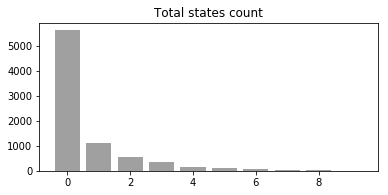

In [23]:
tabular_q_learning(env, 1000, gamma=0.95, with_lr=False,
                   eps_params=eps_params,
                   img_folder='learning_without_lr')

## Learning without lr and without * (1-done)

episode: 0, total reward: 0.04
episode: 1, total reward: 0.060000000000000005
episode: 2, total reward: 0.02
episode: 3, total reward: 0
episode: 4, total reward: 0.05
episode: 5, total reward: 0.02
episode: 6, total reward: 0.05
episode: 7, total reward: 0.01
episode: 8, total reward: 0.02
episode: 9, total reward: 0
episode: 10, total reward: 0.03
episode: 11, total reward: 0
episode: 12, total reward: 0.05
episode: 13, total reward: 0.10999999999999999
episode: 14, total reward: 0.03
episode: 15, total reward: 0.04
episode: 16, total reward: 0.03
episode: 17, total reward: 0.05
episode: 18, total reward: 0.02
episode: 19, total reward: 0.05
episode: 20, total reward: 0.03
episode: 21, total reward: 0.08
episode: 22, total reward: 0.01
episode: 23, total reward: 0
episode: 24, total reward: 0.02
episode: 25, total reward: 0.08
episode: 26, total reward: 0.04
episode: 27, total reward: 0.060000000000000005
episode: 28, total reward: 0.04
episode: 29, total reward: 0.10999999999999999


episode: 216, total reward: 0.17
episode: 217, total reward: 0.15
episode: 218, total reward: 0.17
episode: 219, total reward: 0.15
episode: 220, total reward: 0.15
episode: 221, total reward: 0.17
episode: 222, total reward: 0.15
episode: 223, total reward: 0.18000000000000002
episode: 224, total reward: 0.19000000000000003
episode: 225, total reward: 0.17
episode: 226, total reward: 0.17
episode: 227, total reward: 0.19000000000000003
episode: 228, total reward: 0.17
episode: 229, total reward: 0.19000000000000003
episode: 230, total reward: 0.19000000000000003
episode: 231, total reward: 0.19000000000000003
episode: 232, total reward: 0.17
episode: 233, total reward: 0.19000000000000003
episode: 234, total reward: 0.17
episode: 235, total reward: 0.17
episode: 236, total reward: 0.19000000000000003
episode: 237, total reward: 0.17
episode: 238, total reward: 0.19000000000000003
episode: 239, total reward: 0.15
episode: 240, total reward: 0.19000000000000003
episode: 241, total rewar

KeyboardInterrupt: 

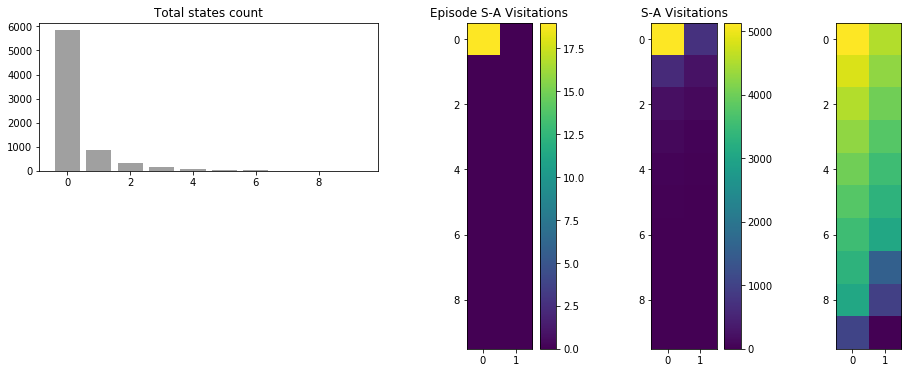

In [25]:
tabular_q_learning(env, 1000, gamma=0.95, with_lr=False, check_done=False,
                   eps_params=eps_params,
                   img_folder='learning_without_lr_without_done')